In [1]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from midterm_lib import DataProcessing, HibriModel

import warnings
warnings.filterwarnings("ignore")

import torch
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
scenario_name = 'scenario_2'

In [3]:
dataset_file = f'./{scenario_name}/risk-train-processed.csv'
dataset = pd.read_csv( dataset_file )
dataset.replace( '?', None, inplace = True )

data_processing = DataProcessing( scenario_name, dataset, one_hot_encoding = True )
( id_train, id_test ), x_train, x_test, y_train, y_test = data_processing.get_train_test( test_size = 0.2, target = 'CLASS' )

In [4]:
model = HibriModel( scenario_name )

./scenario_2/logs/logistic_regression/checkpoint_0.pth

Unmatched parameters in the pretrained model:

Unmatched parameters in the current model:



<All keys matched successfully>



Loaded from: ./scenario_2/logs/logistic_regression - 0





In [5]:
"""
    Possible Models:
    - Decision Tree
    - Random Forest
    - K-Nearest Neighbors
    - XGBoost
    - Support Vector Classifier
    - Ensemble
"""
df_pred = model.predict( ( id_test, x_test[0], x_test[1] ), selected_model = 'Ensemble' )

df_pred['target'] = df_pred['ORDER_ID'].map( dataset.set_index( 'ORDER_ID' )['CLASS'] )
df_pred['target'] = df_pred['target'].apply( lambda x: 1 if x == 'yes' else 0 )
df_pred['predicted_class'] = df_pred['predicted'].apply( lambda x: round( x ) )

100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


In [6]:
print( f'Accuracy: {accuracy_score( df_pred["target"], df_pred["predicted_class"] )}' )
print( f'Precision: {precision_score( df_pred["target"], df_pred["predicted_class"] )}' )
print( f'Recall: {recall_score( df_pred["target"], df_pred["predicted_class"] )}' )
print( f'F1: {f1_score( df_pred["target"], df_pred["predicted_class"] )}' )

print( classification_report( df_pred["target"], df_pred["predicted_class"] ) )

Accuracy: 0.9679100830754195
Precision: 0.6812080536912751
Recall: 0.8481894150417827
F1: 0.7555831265508685
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11560
           1       0.68      0.85      0.76       718

    accuracy                           0.97     12278
   macro avg       0.84      0.91      0.87     12278
weighted avg       0.97      0.97      0.97     12278



In [7]:
print( f"Num High Risk predicted as Low Risk: {len( df_pred[ ( df_pred['predicted_class'] == 0 ) & ( df_pred['target'] == 1 ) ] ) }" )
print( f"Num High Risk predicted as High Risk: {len( df_pred[ ( df_pred['predicted_class'] == 1 ) & ( df_pred['target'] == 1 ) ] ) }\n" )

print( f"Num Low Risk predicted as Low Risk: {len( df_pred[ ( df_pred['predicted_class'] == 0 ) & ( df_pred['target'] == 0 ) ] ) }" )
print( f"Num Low Risk predicted as High Risk: {len( df_pred[ ( df_pred['predicted_class'] == 1 ) & ( df_pred['target'] == 0 ) ] ) }\n" )


Num High Risk predicted as Low Risk: 109
Num High Risk predicted as High Risk: 609

Num Low Risk predicted as Low Risk: 11275
Num Low Risk predicted as High Risk: 285



<Axes: >

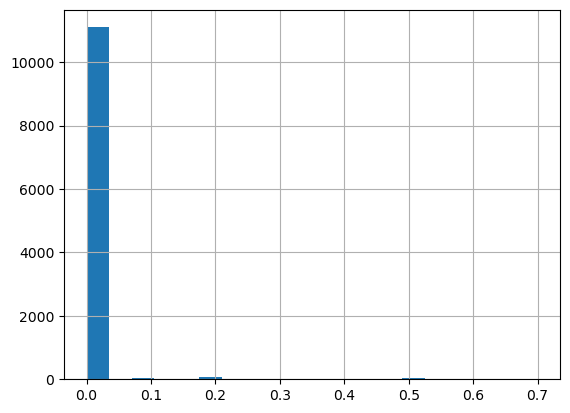

In [13]:
df_pred[ ( df_pred['target'] == 0 ) & ( df_pred['predicted_class'] == 0 ) ]['Confidence'].hist( bins = 20 )

<Axes: >

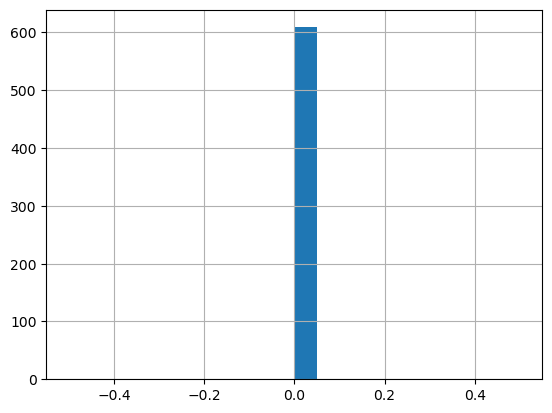

In [10]:
df_pred[ ( df_pred['target'] == 1 ) & ( df_pred['predicted_class'] == 1 ) ]['Unified Confidence'].hist( bins = 20 )